# Assignment 1  

For the exercises below you can use the numpy and scipy libraries.

## Problem 1: Simulation (20 points)

Review amy of the probability theory links [provided in your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/probability/index.html). The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf).

### Problem 1A (15 points)

Simulate (sample from) the bivariate normal distribution with the shown parameters obtaining a plot similar to Figure 6.8b that shows the simulation result from a different bivariate Gaussian distribution.  You can generate $m=200$ samples/points (10 points)

### Problem 1B (5 points)

Plot the contours of the bivariate Gaussian distribution and the simulated points in the same plot. (5 points)

<ipython-input-2-45ac31a114f2>:31: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, pdf_values, levels=10, cmap='viridis', label='Bivariate Gaussian Contours')


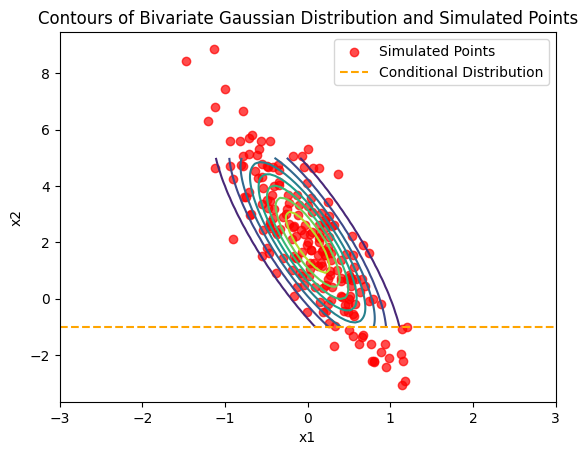

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters for the bivariate Gaussian distribution
mean_vector = np.array([0, 2])
covariance_matrix = np.array([[0.3, -1], [-1, 5]])

# Generate 200 samples from the bivariate normal distribution
samples = np.random.multivariate_normal(mean_vector, covariance_matrix, 200)

# Create a grid of points for contour plot
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-1, 5, 100))
pos = np.dstack((x, y))

# Calculate the bivariate Gaussian PDF values on the grid
pdf_values = multivariate_normal(mean=mean_vector, cov=covariance_matrix).pdf(pos)

# Condition on x2 = -1 to obtain the conditional distribution
conditional_mean = mean_vector[0] + covariance_matrix[1, 0] / covariance_matrix[1, 1] * (-1 - mean_vector[1])
conditional_variance = covariance_matrix[0, 0] - covariance_matrix[1, 0] / covariance_matrix[1, 1] * covariance_matrix[0, 1]

# Define a function to calculate the conditional PDF
def conditional_pdf(x1, x2=-1):
    return multivariate_normal(mean=[conditional_mean, x2], cov=[[conditional_variance, 0], [0, 1]])

# Calculate the conditional PDF values on the grid
conditional_pdf_values = np.array([[conditional_pdf(x1, x2).pdf([x1, x2]) for x1 in x[0, :]] for x2 in y[:, 0]])

# Plot the contours of the bivariate Gaussian distribution
plt.contour(x, y, pdf_values, levels=10, cmap='viridis', label='Bivariate Gaussian Contours')

# Scatter plot for simulated points
plt.scatter(samples[:, 0], samples[:, 1], label='Simulated Points', color='red', alpha=0.7)

# Plot the conditional distribution as a line
plt.axhline(y=-1, color='orange', linestyle='--', label='Conditional Distribution')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Contours of Bivariate Gaussian Distribution and Simulated Points')
plt.show()


## Problem 2: Projection (20 points)

You may want to review these [linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos or the [other linear algebra links](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/linear-algebra/index.html) provided in your course site.

Simulate a 3-dimensional (3d) Gaussian random vector with the following covariance matrix.

$$
\begin{bmatrix}
4 & 2 & 1 \\
2 & 3 & 1.5 \\
1 & 1.5 & 2 \\
\end{bmatrix}
$$

Using the Singular Value Decomposition (SVD) compute the projection of the simulated vector onto the subspace spanned by the first two principal components.

### Problem 2A (5 points)

What determines the principal components ?

### Problem 2B (5 points)

What determines the positive or negative correlations between the components ?

### Problem 2C (10 points)

Plot the projected vector and show whether or not the projection agrees with the positive or negative correlations of the original matrix.



Problem 2A: The principal components are the directions of maximum variance in the orginal data. Principal components are determined by values of the matrix V that come during the Singular Value Decomposition.

Problem 2B: The sign of each entry in the columns of V determines the direction of the corresponding principal component.If an entry is positive, an increase in the corresponding original feature is associated with an increase in the principal component.If an entry is negative, an increase in the corresponding original feature is associated with a decrease in the principal component.

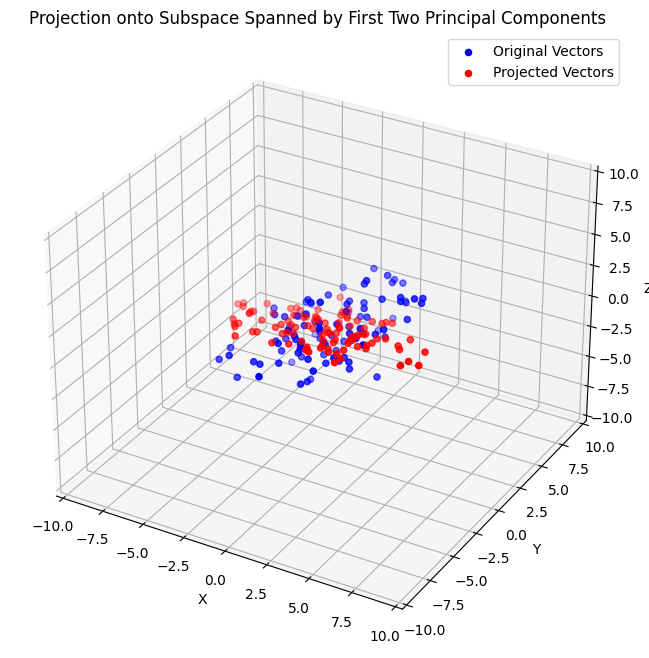

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the covariance matrix
covariance_matrix = np.array([[4, 2, 1], [2, 3, 1.5], [1, 1.5, 2]])

# Simulate a 3-dimensional Gaussian random vector with 100 samples
mean_vector = np.zeros(3)
num_samples = 100
simulated_vectors = np.random.multivariate_normal(mean_vector, covariance_matrix, num_samples)

# Perform Singular Value Decomposition (SVD)
_, _, Vt = np.linalg.svd(covariance_matrix)

# Take the first two principal components from Vt
principal_components = Vt[:2, :]

# Project the simulated vectors onto the subspace spanned by the first two principal components
projections = np.dot(principal_components, simulated_vectors.T)

# Plot the original and projected vectors
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Original vectors
ax.scatter(simulated_vectors[:, 0], simulated_vectors[:, 1], simulated_vectors[:, 2], color='blue', label='Original Vectors')

# Projected vectors
ax.scatter(projections[0], projections[1], np.zeros(num_samples), color='red', label='Projected Vectors')

ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.title('Projection onto Subspace Spanned by First Two Principal Components')
plt.show()


### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

In [ ]:
# Insert your answer here and fee free to add markdown cells as needed

### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement from scratch for the linear regression problem some enhancements that  can improve the convergence of the algorithm.

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and comparatively to the baseline SGD algorithm. You can include all plots in the same figure.

In [ ]:
# Insert your answer here and fee free to add markdown cells as needed